# CITY 
*** 

#### LIBRARIES

In [4]:
import os
import glob
%matplotlib inline
import pandas as pd
import seaborn as sns
import missingno as msno
import ipywidgets as widgets
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15,10)
from toggle_cell import toggle_code as hide
hide()

#### LOAD FILES

In [7]:
combined_csv = r"C:\Users\LOCALGHOST\Desktop\DATASETS\AIR_QUALITY\WAQI\Processed\combined_csv.csv" #add your path here
combined_df = pd.read_csv(combined_csv, parse_dates = True,index_col = 'date')
gauge_list = sorted(combined_df['gauge'].unique())
city_list = sorted(combined_df.city.unique())
gauge_li = widgets.Dropdown(options = gauge_list)
city_li = widgets.Dropdown(options = city_list)
hide()

In [9]:
hide()
from IPython.display import HTML
from IPython.display import display

tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<a href="javascript:code_toggle()">Click here</a> Select Options and run the code below''')
display(tag)

############### Write code below ##################
display(city_li,gauge_li)


Dropdown(options=('Abha', 'Abidjan', 'Abu Dhabi', 'Accra', 'Adana', 'Adapazarı', 'Addis Ababa', 'Adelaide', 'A…

Dropdown(options=('aqi', 'co', 'd', 'dew', 'humidity', 'mepaqi', 'neph', 'no2', 'o3', 'pm1', 'pm10', 'pm25', '…

In [71]:
city  = city_li.value
gauge = gauge_li.value

PREVIEW

In [41]:
city = city_li.value
gauge = gauge_li.value
city_df = combined_df[(combined_df.city == city_li.value) & (combined_df.gauge == gauge_li.value)][['min','max','median']]
hide()
city_df[0:5]

,min,max,median
date,,,
2015-01-01,3.8,9.0,4.6
2015-01-02,3.7,12.1,4.7
2015-01-05,2.2,22.6,9.0
2015-01-06,3.5,7.3,6.2
2015-01-09,0.5,12.0,8.6


*** 


#### DUPLICATES 

*** 


In [42]:
city_df = city_df.resample('D').mean()

In [43]:
end_date = city_df.index.max()
start_date = city_df.index.min()
display("Start date : {}".format(start_date),"End date : {}".format(end_date))

'Start date : 2015-01-01 00:00:00'

'End date : 2020-05-06 00:00:00'

*** 

#### OUTLIERS

*** 


In [16]:
col = 'max'

All changes are made in a duplicate df

In [17]:
# city_df_out = city_df
# shape1 = city_df_out.shape
# print("Total rows : "+str(shape1[0]))

In [18]:
# city_df_out.boxplot()
# plt.show()

To remove any outliers :    
    - use the slider to select max_value
    - uncomment the following cell and run remaining cells

In [46]:
widgets.IntSlider(
    min=10,
    max=1000,
    step=10,
    description='Slider:',
    value=50
)
slider = widgets.IntSlider()
display(slider)
hide()

IntSlider(value=0)

In [20]:
# city_df_out = city_df_out[city_df_out[col]<slider.value] # filtered out outliers
# shape2 = city_df_out.shape
# display('Total rows = {}'.format(shape2[0]))
# display("{} rows removed".format(shape1[0]-shape2[0]))
# city_df_out.boxplot()
# plt.show()

In [21]:
# city_df = city_df_out

*** 

### CITY - DAILY

*** 

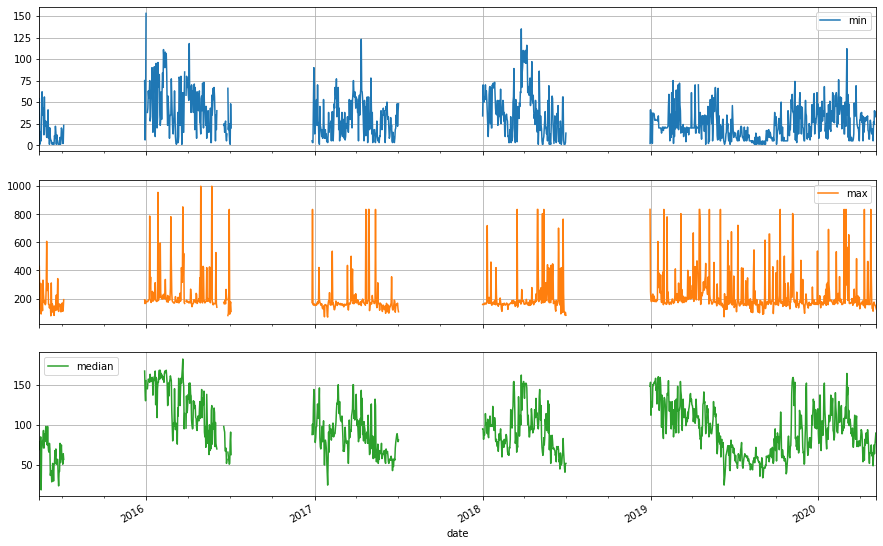

In [22]:
plt.rcParams['figure.figsize'] = (15,10)
city_df.plot(subplots = True,grid = True)
plt.show()

*** 
MISSING VALUES

Since sensors send value only when a significant amount of pollution is detected, we will be having alot of missing values. So if you want to conduct a study on daily basis - find and use appropriate techniques to interpolate values.

*** 

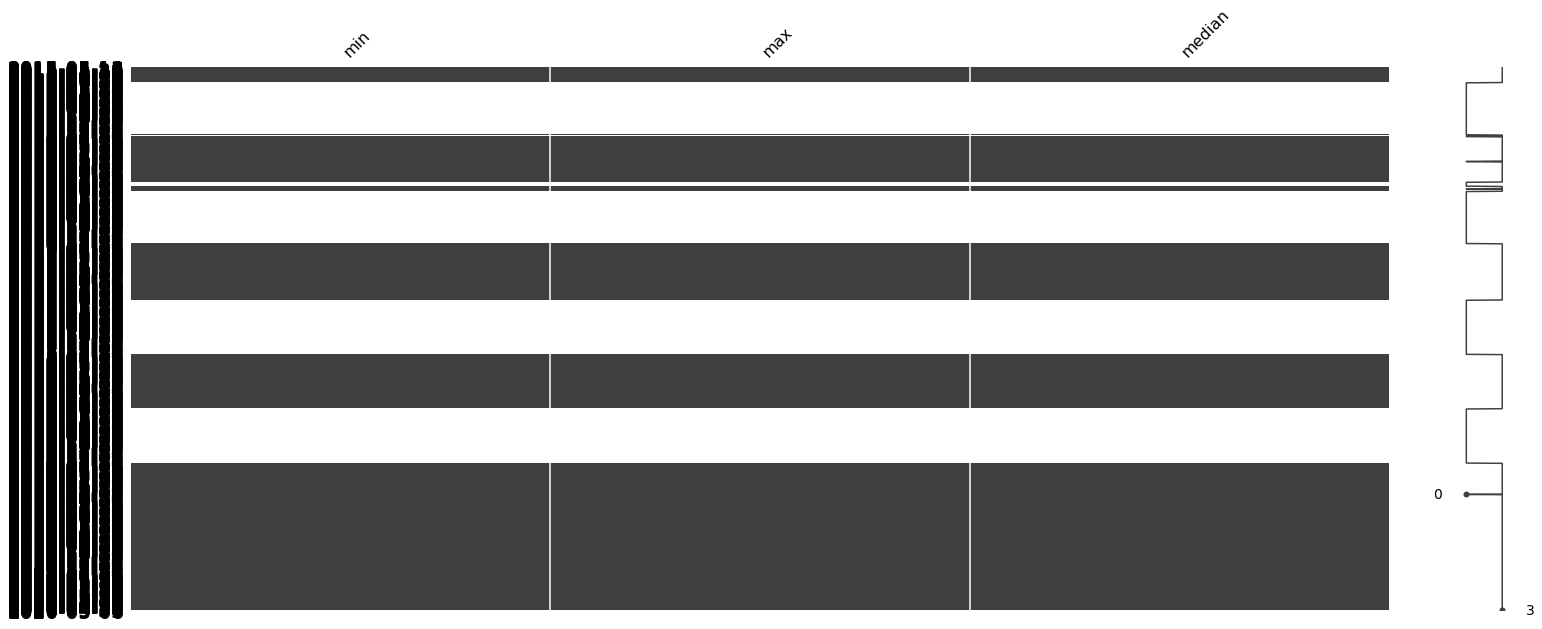

In [23]:
msno.matrix(city_df, freq = 'D')

In [24]:
mval = city_df.isna().sum()
print( 'Missing Values ::' ,mval)

Missing Values :: min       734
max       734
median    734
dtype: int64


## city - WEEKLY

*** 


MISSING VALUES

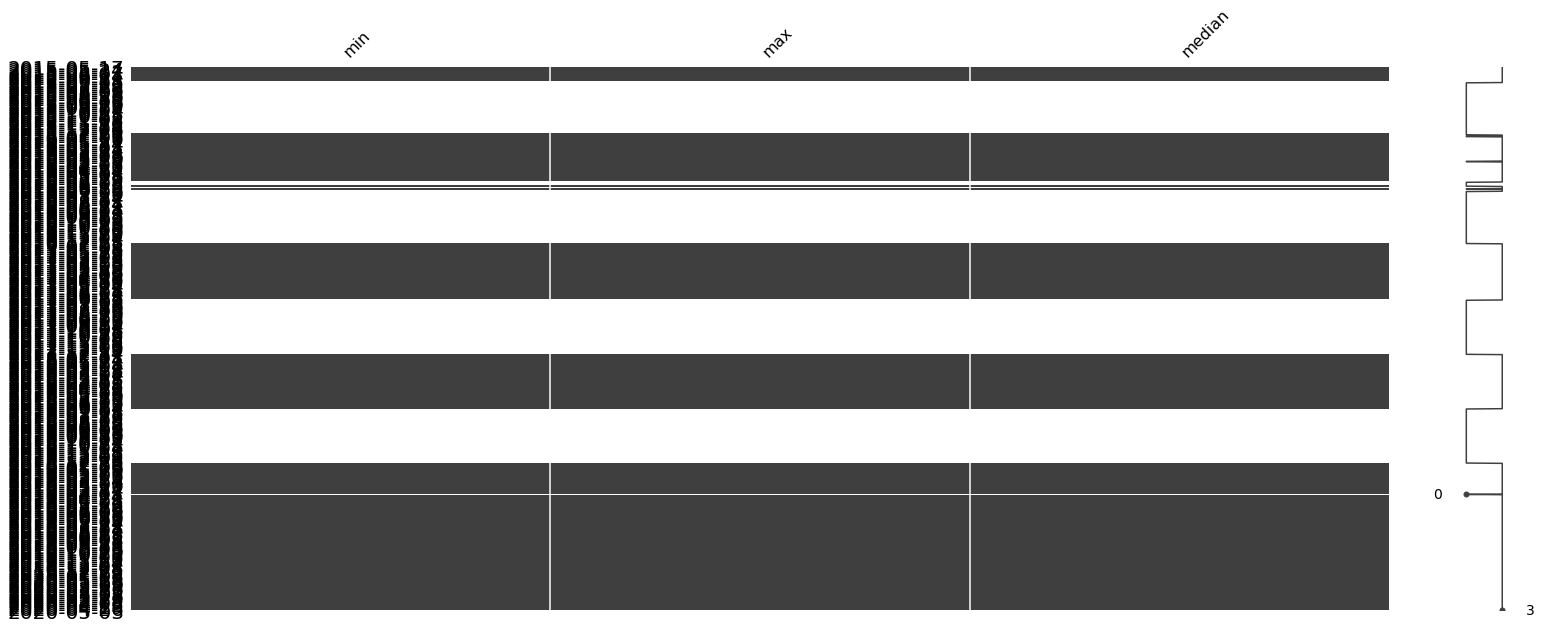

In [25]:
msno.matrix(city_df , freq = 'W')

In [26]:
city_df_w = city_df.resample('W').mean()

'PM25-weekly-Bengaluru'

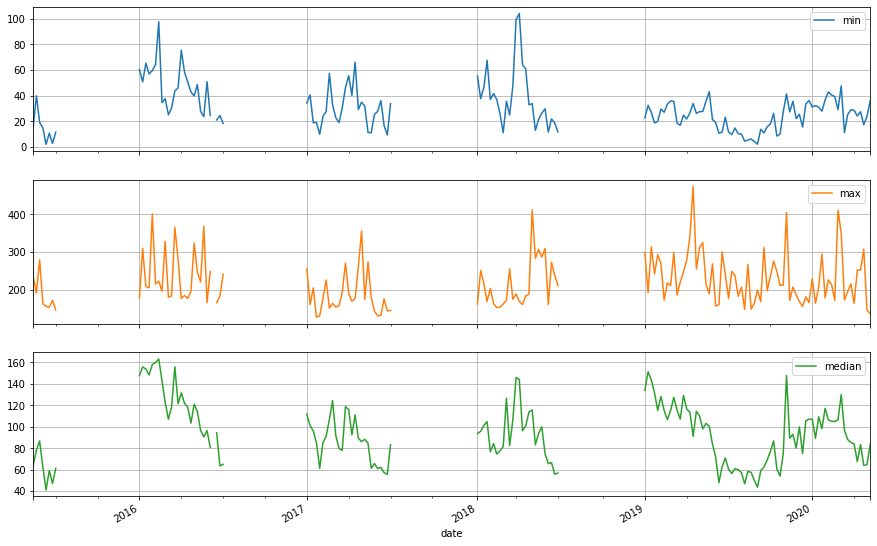

In [27]:
city_df_w.plot(subplots=True,grid = True)
display(str.upper(gauge)+"-weekly-"+city)
plt.show()

*** 

*** 


## CITY - MONTHLY

*** 


In [28]:
city_df_m = city_df.asfreq('M')

MISSING VALUES

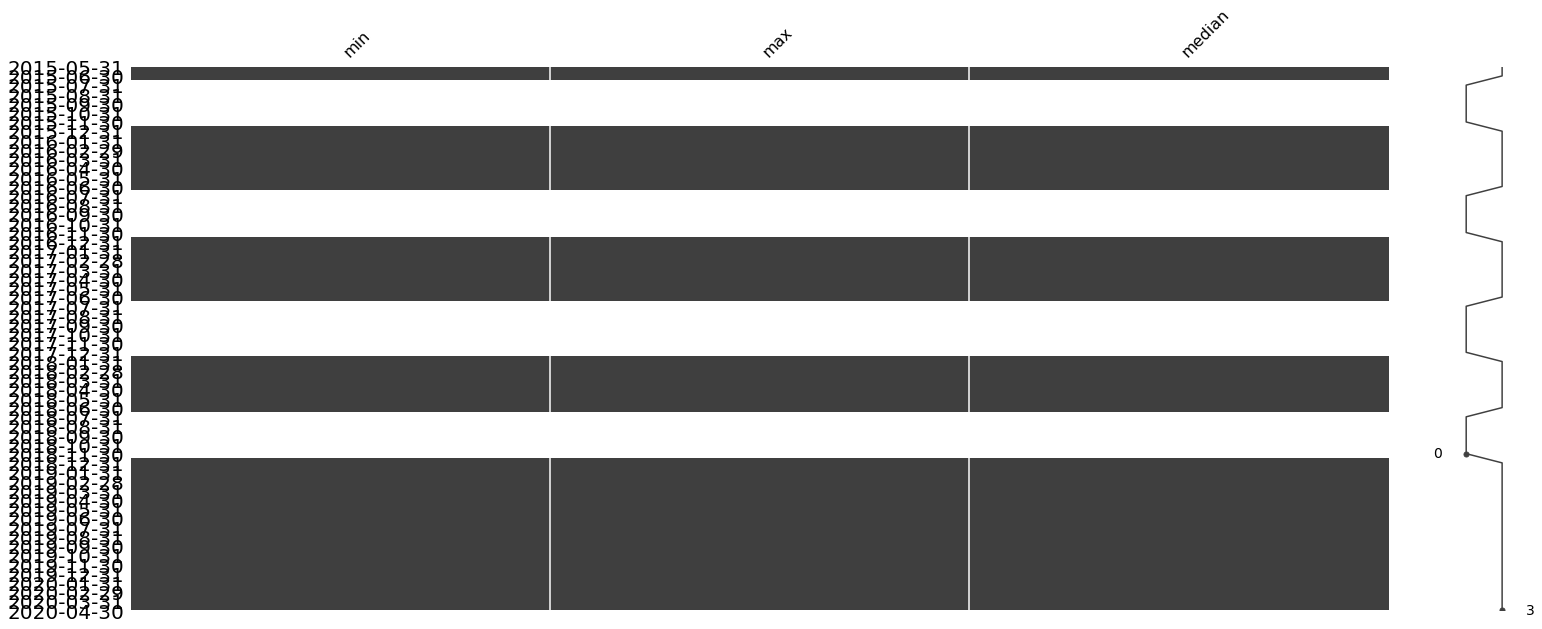

In [29]:
msno.matrix(city_df_m , freq = 'M')

'PM25-monthly-Bengaluru'

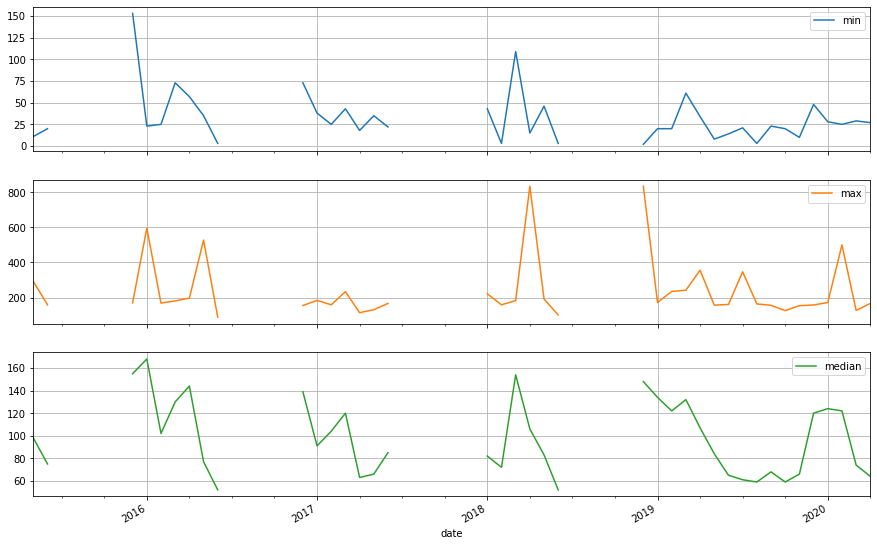

In [30]:
city_df_m.plot(subplots=True,grid = True)
display(str.upper(gauge)+"-monthly-"+city)
plt.show()

*** 

## CITY - QUATERLY

*** 


MISSING VALUES

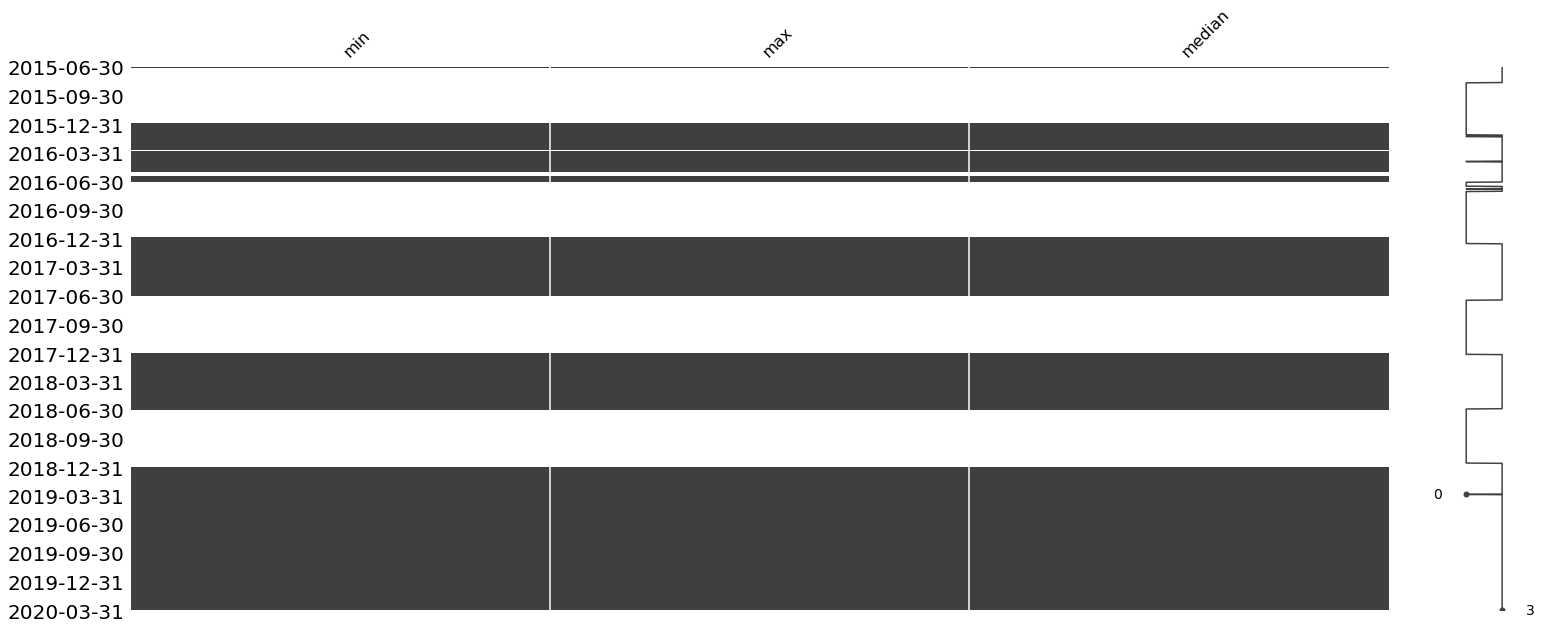

In [31]:
msno.matrix(city_df, freq = 'Q')

In [32]:
city_df_q = city_df.asfreq('QS')

'PM25-quarterly-Bengaluru'

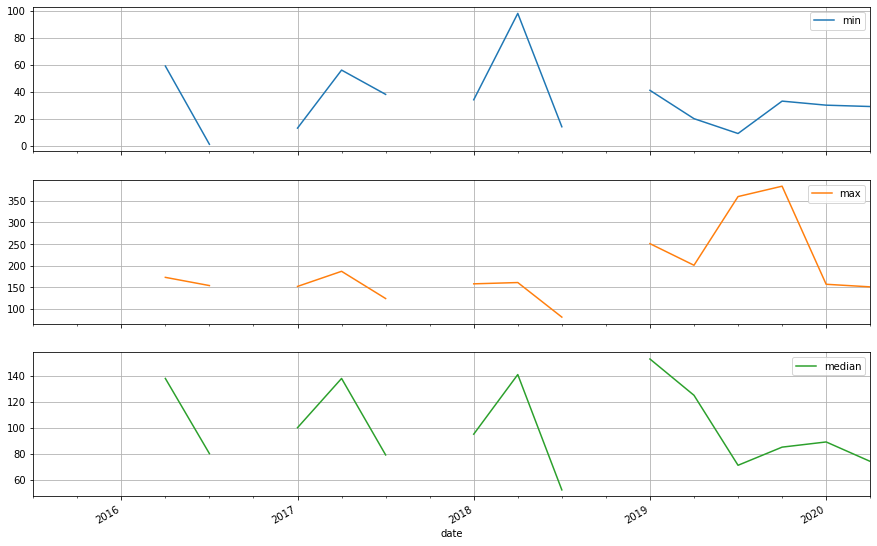

In [33]:
city_df_q.plot(subplots=True , grid = True)
display(str.upper(gauge)+"-quarterly-"+city)
plt.show()

## CITY - YEARLY

*** 


MISSING VALUES

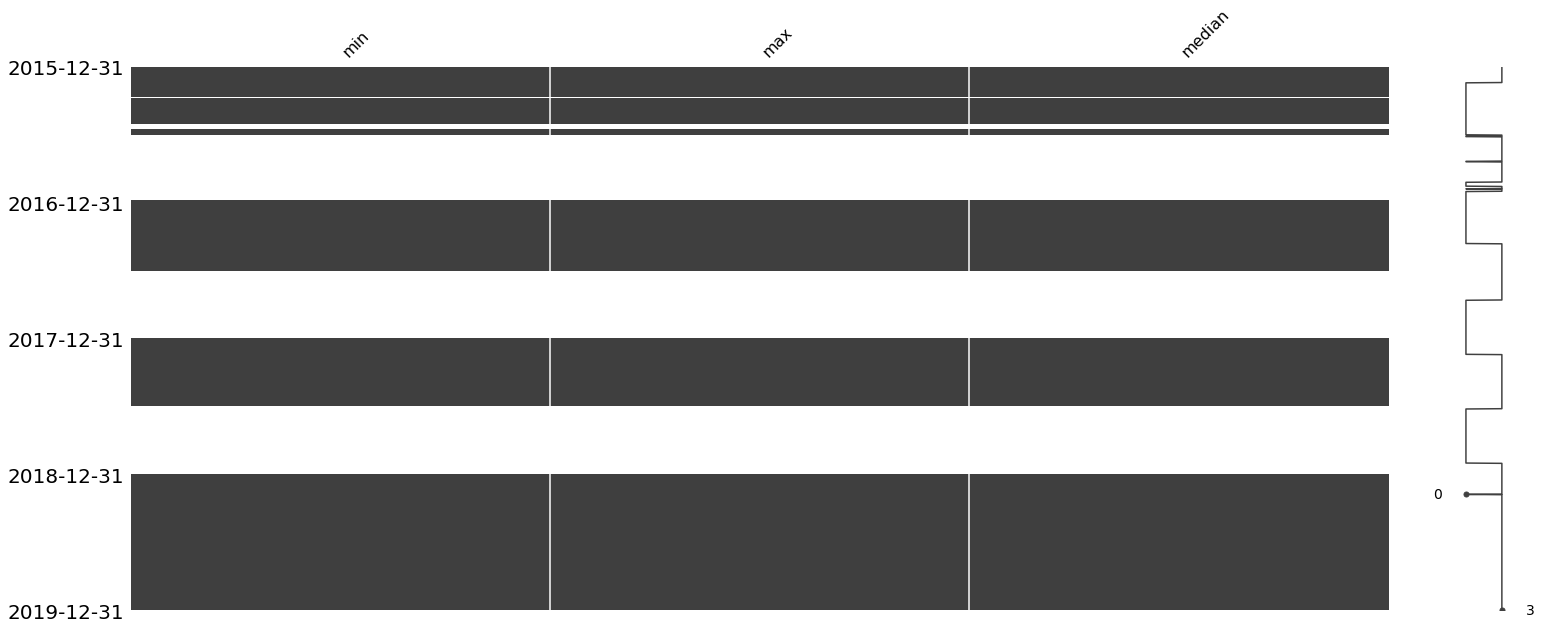

In [34]:
msno.matrix(city_df , freq = 'Y')

In [35]:
city_df_y = city_df.asfreq('Y' , how = 'start')

'PM25-yearly-Bengaluru'

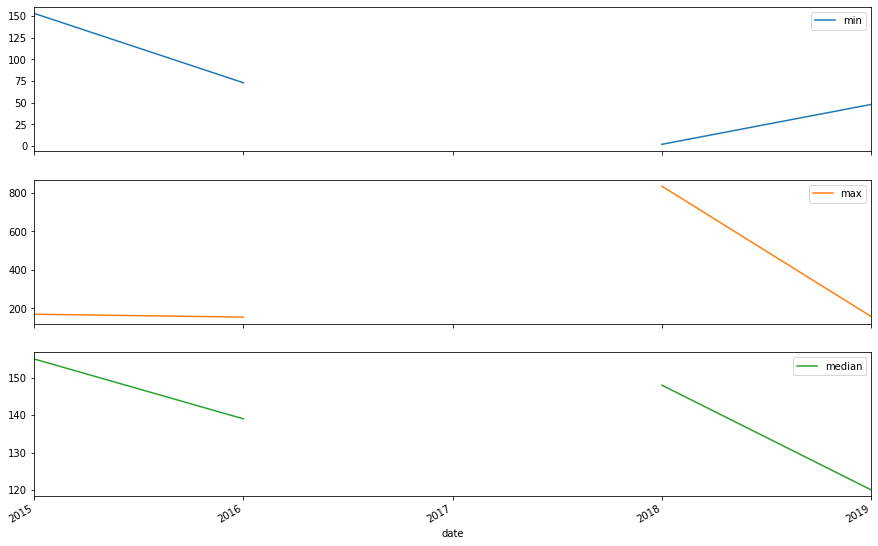

In [36]:
city_df_y.plot(subplots=True)
display(str.upper(gauge)+"-yearly-"+city)
plt.show()

*** 
#### TO GENERATE DATA WITHOUT FILLING MISSING VALUES - RUN CELL BELOW
*** 

In [37]:
# csv = '.\\data\\processed\\'+city+'_'+gauge+'_'+'_mly.csv'
# city_df_m.to_csv(csv)

*** 

***  
#### TO GENERATE DATA WITH MISSING VALUES FILLED - RUN CELL BELOW
*** 

In [ ]:
# csv = '.\\data\\processed\\'+city+'_'+gauge+'_'+'_mly_filled.csv'
# city_df_m_intpl.to_csv(csv)

*** 